In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
normal_data=pd.read_csv("../Normal_data.csv")
metasploti_data=pd.read_csv("../metasploitable-2.csv")
ovs_data=pd.read_csv("../OVS.csv")

In [3]:
frames=[normal_data,metasploti_data,ovs_data]
data=pd.concat(frames,ignore_index=True)

In [4]:
data.Label = data.Label.str.replace(' ', '')
print(data.Label.unique())

['Normal' 'U2R' 'BFA' 'DDoS' 'DoS' 'Probe' 'Web-Attack' 'BOTNET']


In [5]:
data=data.loc[:, (data != 0).any(axis=0)]

In [6]:
data3 = data.loc[:, data.columns.difference(['Flow ID', 'Src IP','Dst IP','Timestamp','Src Port','Dst Port','Protocol'])]
data3=data3.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
data3.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0,0.0,0.0,0.0,0.0,0,12.0,12.0,12.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,64,3369.0,3369.0,3369.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0,13.0,13.0,13.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
3,1,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.00000,...,0,0,1,248,2,1,2,0.0,248.0,0
4,0,0.0,0.0,0.0,0.0,144,167136.0,115976.2,2573.0,72264.35192,...,1,3510,6,370,7,6,7,3510.0,370.0,0


In [7]:
data3.Label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
data3.Label.replace("Saldiri","1",inplace=True)
data3.Label.replace("Normal","0",inplace=True)
data3.Label.unique()

array(['1', '0'], dtype=object)

In [8]:
X=data3[["ACK Flag Cnt",
"Active Max",
"Active Mean",
"Active Std",
"Bwd IAT Tot",
"Bwd PSH Flags",
"Bwd Pkt Len Max",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Bwd Seg Size Avg",
"Bwd URG Flags",
"Down/Up Ratio",
"FIN Flag Cnt",
"Flow Duration",
"Flow Pkts/s",
"Fwd IAT Max",
"Fwd IAT Mean",
"Fwd IAT Std",
"Fwd IAT Tot",
"Fwd Pkt Len Max",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Min",
"Fwd Pkt Len Std",
"Fwd Pkts/s",
"Fwd Seg Size Avg",
"Idle Std",
"Init Bwd Win Byts",
"PSH Flag Cnt",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"SYN Flag Cnt",
"Tot Fwd Pkts",
"URG Flag Cnt"]]
y=data3.Label
print(X.shape)
print(y.shape)

(343889, 39)
(343889,)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.61566854, -0.08817253, -0.07895971, ..., -0.55665404,
        -0.06209157, -0.10935765],
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.55665404,
        -0.06209157, -0.10935765],
       [-0.61566854, -0.08817253, -0.07895971, ..., -0.55665404,
        -0.06209157, -0.10935765],
       ...,
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.55665404,
        -0.06209157, -0.10935765],
       [ 1.62425061, -0.08709042, -0.07730406, ..., -0.55665404,
        -0.00703453, -0.10935765],
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.55665404,
        -0.06209157, -0.10935765]])

In [10]:
y= pd.get_dummies(y, drop_first=True)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\Birol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9965803217289149

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
model = XGBRegressor(n_estimators=1000,learning_rate=0.5,n_jobs=4)
model.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_test, y_test)],
             verbose=False)
pred=model.predict(X_test)
print("----- XGBoost ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- XGBoost ------")

C:\Users\Birol\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


----- XGBoost ------
0.999097371818544
0.0003566640745457833
----- XGBoost ------


In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- Random Forest ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- Random Forest ------")

----- Random Forest ------
0.9991850287174292
0.0003566640745457833
----- Random Forest ------


In [14]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- KNN ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- KNN ------")

----- KNN ------
0.9997790003838415
0.0003566640745457833
----- KNN ------


In [11]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- DecisionTreeRegressor ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- DecisionTreeRegressor ------")

----- DecisionTreeRegressor ------
0.9989115527068736


NameError: name 'mean_absolute_error' is not defined

In [13]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- AdaBoostClassifier ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- AdaBoostClassifier ------")

----- AdaBoostClassifier ------
0.9988717388017169


NameError: name 'pred' is not defined

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("----- GaussianNB ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- GaussianNB ------")

----- GaussianNB ------
0.9329673269514848
0.06703267304851523
----- GaussianNB ------


C:\Users\Birol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


from sklearn.svm import SVC
model = SVC(C=1.0, random_state=1, kernel='linear')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- SVC ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- SVC ------")

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, SimpleRNN, LSTM,Masking,Bidirectional
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import model_from_json,model_from_yaml,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from keras import metrics, regularizers
from keras.optimizers import RMSprop,Adam
from keras import backend as K

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(257916, 39)
(85973, 39)
(257916, 1)
(85973, 1)


In [13]:
# Model için gerekli değerler
#epochs_sayisi=5
batch_size=512
# Çıktı gözükmemesi için
verbose=1
validation_split=0.1
max_len=len(X.columns)
vocab_size=10000

In [14]:
def rnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(SimpleRNN(40,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(24,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [15]:
def lstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [16]:
def bilstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(Bidirectional(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model

In [17]:
def cnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(Conv1D(32,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(16,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(4,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    return history,model
    #model.summary()

In [19]:
#epoch_sayisi=int(input("Eposh sayisini giriniz..:"))

print('''
    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    ''')

epoch_sayisi=2
for algoritma in ["cnn" ,"rnn", "lstm"]:
    print(f"\n\n {algoritma} ---- ")
    #algoritma=input("Seçim:").lower()
    if(algoritma=="cnn"):
        history,model=cnn(epoch_sayisi)
    elif(algoritma=="rnn"):
        history,model=rnn(epoch_sayisi)
    elif(algoritma=="lstm"):
        history,model=lstm(epoch_sayisi)

#print("**** %s modelinde %s epochluk Acc %.2f  Loss %.2f" %(algoritma,epoch_sayisi,history.history['acc'][epoch_sayisi-1]*100,history.history['loss'][epoch_sayisi-1]*100))

#rnn_test=test(algoritma,model)


    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    


 cnn ---- 
Epoch 1/2


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


454/454 [==============================] - 14s 29ms/step - loss: 0.6198 - acc: 0.8008 - val_loss: 0.4987 - val_acc: 0.8020
Epoch 2/2
454/454 [==============================] - 14s 30ms/step - loss: 0.4996 - acc: 0.8009 - val_loss: 0.4978 - val_acc: 0.8020


 rnn ---- 
Epoch 1/2


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


454/454 [==============================] - 90s 184ms/step - loss: 0.6190 - acc: 0.9242 - val_loss: 0.0867 - val_acc: 0.9925
Epoch 2/2
454/454 [==============================] - 75s 166ms/step - loss: 0.0700 - acc: 0.9919 - val_loss: 0.1989 - val_acc: 0.9620


 lstm ---- 


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/2
454/454 [==============================] - 105s 205ms/step - loss: 0.5265 - acc: 0.8796 - val_loss: 0.1970 - val_acc: 0.9797
Epoch 2/2
454/454 [==============================] - 90s 198ms/step - loss: 0.1661 - acc: 0.9725 - val_loss: 0.0947 - val_acc: 0.9855


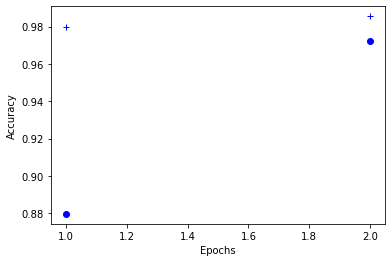

In [20]:
import matplotlib.pyplot as plt
import time
epochs = range(1, epoch_sayisi+1)
Acc = history.history['acc']
Val_acc =history.history['val_acc']
plt.plot(epochs, Acc, 'bo', label='Acc')
plt.plot(epochs, Val_acc, 'b+', label='Vall Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()